In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression         # comment définir un modèle linéaire?
from sklearn.metrics import mean_squared_error
from pathlib import Path

from cloud_io.gcp.io import download_file
from reglin.tools.common_path import ROOT_PATH, BUCKET_NAME

ModuleNotFoundError: No module named 'cloud_io'

![title](../images/simple_workflow.png)

# Collecte des données

## Lecture

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [ ]:
download_path = Path(ROOT_PATH, "data/Life Expectancy Data.csv")
path_data = download_file(download_path, bucket_as_local=ROOT_PATH, bucket_name=BUCKET_NAME)

In [5]:
df = pd.read_csv(path_data)
df_2015 = df[df.Year == 2014]
df_2015 = df_2015.drop("Year",axis=1)
df_2015.set_index("Country",inplace = True)

In [6]:
data = df_2015[['Life expectancy ','Schooling']]
data = data.dropna(axis=0)

In [7]:
data.head()

,Life expectancy,Schooling
Country,,
Afghanistan,59.9,10.0
Albania,77.5,14.2
Algeria,75.4,14.4
Angola,51.7,11.4
Antigua and Barbuda,76.2,13.9


## Définition

**Schooling**: Les années de scolarisation sont le nombre d'années qu'un enfant en âge d'entrer à l'école est censé passer à l'école ou à l'université, y compris les années passées à redoubler. Il s'agit de la somme des taux de scolarisation par âge dans l'enseignement primaire, secondaire, post-secondaire non tertiaire et tertiaire.

**Life expectancy**: Nombre moyen d'années qu'un nouveau-né pourrait espérer vivre s'il était exposé aux taux de mortalité par sexe et par âge en vigueur au moment de sa naissance, pour une année donnée, dans un pays, un territoire ou une zone géographique donné(e).

# Définition du modèle

On va faire un modèle de régression linéaire: $Y = a \times X + b$

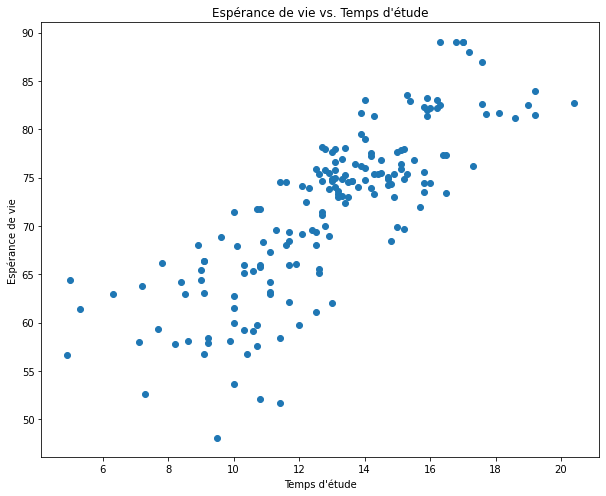

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y = data['Life expectancy '],x = data['Schooling'])
plt.xlabel("Temps d'étude")
plt.ylabel("Espérance de vie")
plt.title("Espérance de vie vs. Temps d'étude")
plt.show()

In [9]:
modele_simple = LinearRegression()

# Calibrage du modèle

On va chercher les meilleurs paramètres $a$ et $b$

In [10]:
modele_simple.fit(data[['Schooling']],data['Life expectancy '])

LinearRegression()

In [11]:
modele_simple.intercept_

41.51230517169596

In [12]:
modele_simple.coef_

array([2.33714788])

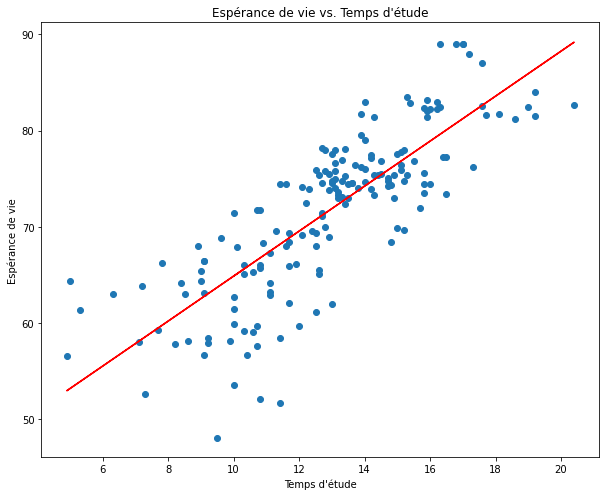

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y = data['Life expectancy '],x = data['Schooling'])

Y_model = modele_simple.predict(data[['Schooling']])
ax.plot(data['Schooling'],Y_model,"red")

plt.xlabel("Temps d'étude")
plt.ylabel("Espérance de vie")
plt.title("Espérance de vie vs. Temps d'étude")
plt.show()

In [14]:
mean_squared_error(y_true = data['Life expectancy '], 
                   y_pred = Y_model,
                   squared=False)

4.953906804181933

# Nouvelle donnée

https://www.nationmaster.com/country-info/profiles/Benin/Education

In [15]:
nouvelle_donnee = pd.DataFrame({"Schooling":[5]}
)

In [16]:
modele_simple.predict(nouvelle_donnee)

array([53.19804459])

# **FIN** 